# Project 1

```

Program ini dibuat untuk menganalisa, mengidentifikasi, menjabarkan dan memvisualisasikan sebuah permasalahan

```

# Tableau Public Link

https://public.tableau.com/views/h8dsft_Milestone1_Reski_Hidayat/ANALISAREKOMENDASIPENUMPANG?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

# Case Study - Passanger Recommendation

#### Kamu adalah seorang seorang Data Analyst di maskapai perusahaan internasional menyadari kalau rating penumpang mempengaruhi rekomendasi mereka, sasaran kamu adalah meningkatkan faktor kepuasan pelanggan sehingga meningkatkan customer baru berdasarkan rekomendasi penumpang.

# Identifikasi Masalah

### Defining the Problem Statements

Using SMART framework:

1. **Specific**: Meningkatkan kualitas pelayanan saat penerbangan.

2. **Measurable**: Mencapai tingkat rekomendasi penumpang sebesar 10%.

3. **Achievable**: Memberikan service pengalaman terbaik kepada penumpang.

4. **Relevant**: Mendatangkan penumpang baru untuk meningkatkan pendapatan.

5. **Time-Bound**: Dapat dicapai di kuartal berikutnya.

`Problem statement`:

Tujuannya adalah meningkatkan rekomendasi penumpang sebesar 10% pada kuartal berikutnya. Hal ini akan dapat dicapai dengan meningkatkan service layanan terbaik yang pada akhirnya akan mendorong peningkatan pendapatan yg lebih tinggi.

### Breaking Down the Problem

Main Problem: `Meningkatkan tingkat rekomendasi penumpang`

Untuk memudahkan analisis dalam pemecahan masalah, kita perlu memahami secara detail tentang masalah tersebut. Untuk melakukannya, kita menggunakan kerangka `5W+1H` untuk menemukan akar masalah.

The `5W+1H`s:
- Apa faktor yg meningkatkan rekomendasi penumpang?
- Siapa penumpang terbanyak yg memberikan rekomendasi?
- Bagaimana cara meningkatkan service untuk meningkatkan rekomendasi penumpang?
- Kenapa meningkatkan rekomendasi penumpang penting bagi perusahaan?

Kita menggunakan 4 pertanyaan diatas untuk membantu analisa.

# Data Loading

* Sumber diambil dari Kaggle.com dengan Judul Dataset `Airlines Reviews and Rating`
* Link : https://www.kaggle.com/datasets/anandshaw2001/airlines-reviews-and-rating

## Import Library

In [88]:
import pandas as pd
import psycopg2
from psycopg2 import sql
from scipy import stats
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

C:\Users\reski\AppData\Local\Temp\ipykernel_16360\516702868.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Loading Data Menggunakan PostGresSQL

In [89]:
db_user = "postgres"
db_password = "admin"
db_host = "localhost"
db_port = "5432"

# Membuat koneksi ke database tanpa memilih database
connection = psycopg2.connect(
    user=db_user,
    password=db_password,
    host=db_host,
    port=db_port
)

cursor = connection.cursor()

# Mengubah koneksi untuk memilih database tertentu
connection = psycopg2.connect(
    user=db_user,
    password=db_password,
    host=db_host,
    port=db_port,
    database="db_airlines"
)

## Menampilkan Tipe Dataset

In [90]:
# Query SQL
data = '''SELECT * FROM airlines;'''

 # Menampilkan informasi DataFrame
df = pd.read_sql_query(data, connection)

df.info()

C:\Users\reski\AppData\Local\Temp\ipykernel_16360\3104828243.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(data, connection)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   aircraft_type           1896 non-null   object 
 1   users_reviews           3290 non-null   object 
 2   country                 3289 non-null   object 
 3   type_of_travellers      2887 non-null   object 
 4   route                   2883 non-null   object 
 5   seat_types              3287 non-null   object 
 6   seat_comfort            3176 non-null   float64
 7   date_flown              2880 non-null   object 
 8   cabin_staff_service     3165 non-null   float64
 9   ground_service          2812 non-null   float64
 10  food_beverages          2911 non-null   float64
 11  wifi_connectivity       592 non-null    float64
 12  inflight_entertainment  2171 non-null   float64
 13  value_for_money         3290 non-null   int64  
 14  recommended             3290 non-null   

## Menampilkan hasil loading data dari PostGresSQL

In [91]:
df.head()

,aircraft_type,users_reviews,country,type_of_travellers,route,seat_types,seat_comfort,date_flown,cabin_staff_service,ground_service,food_beverages,wifi_connectivity,inflight_entertainment,value_for_money,recommended
0,None,✅Trip Verified| Cancelled our flight last-min...,United Kingdom,Couple Leisure,London Heathrow to Tokyo,Economy Class,1.0,Sep-23,1.0,2.0,1.0,NaN,3.0,1,no
1,None,"✅Trip Verified| I had a flight from Miami, Flo...",United States,Solo Leisure,Miami to Dublin via London Heathrow,Business Class,1.0,Aug-23,3.0,1.0,2.0,1.0,1.0,1,no
2,None,✅Trip Verified| We started our day with BA in...,United States,Business,Prague to San Francisco via London,Business Class,1.0,Sep-23,3.0,1.0,3.0,1.0,NaN,1,no
3,None,✅Trip Verified| I fly British Airways weekly ...,United Kingdom,Business,London to Glasgow,Economy Class,1.0,Sep-23,1.0,1.0,1.0,1.0,1.0,1,no
4,None,Not Verified| Everything was ok until our con...,France,Family Leisure,San Diego to Marseille via London,Economy Class,3.0,Aug-23,2.0,1.0,3.0,1.0,3.0,3,no


### Mengidentifikasi Missing Value dari DataFrame

In [92]:
df.isnull().sum()

aircraft_type             1394
users_reviews                0
country                      1
type_of_travellers         403
route                      407
seat_types                   3
seat_comfort               114
date_flown                 410
cabin_staff_service        125
ground_service             478
food_beverages             379
wifi_connectivity         2698
inflight_entertainment    1119
value_for_money              0
recommended                  0
dtype: int64

### Mengidentifikasi Tipe Data

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   aircraft_type           1896 non-null   object 
 1   users_reviews           3290 non-null   object 
 2   country                 3289 non-null   object 
 3   type_of_travellers      2887 non-null   object 
 4   route                   2883 non-null   object 
 5   seat_types              3287 non-null   object 
 6   seat_comfort            3176 non-null   float64
 7   date_flown              2880 non-null   object 
 8   cabin_staff_service     3165 non-null   float64
 9   ground_service          2812 non-null   float64
 10  food_beverages          2911 non-null   float64
 11  wifi_connectivity       592 non-null    float64
 12  inflight_entertainment  2171 non-null   float64
 13  value_for_money         3290 non-null   int64  
 14  recommended             3290 non-null   

In [94]:
print("Total Jumlah Missing Value Setiap Kolom:", df.isnull().sum().sum())

Total Jumlah Missing Value Setiap Kolom: 7531


Terdapat 7531 data missing Value di dalam dataset

# Data Cleaning

### Data Characteristic

#### Proses Pembersihan Missing Value pada kolom `aircraft_type`

In [95]:
dfc = df.dropna(subset='aircraft_type', axis=0)
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896 entries, 5 to 2895
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   aircraft_type           1896 non-null   object 
 1   users_reviews           1896 non-null   object 
 2   country                 1896 non-null   object 
 3   type_of_travellers      1895 non-null   object 
 4   route                   1895 non-null   object 
 5   seat_types              1896 non-null   object 
 6   seat_comfort            1883 non-null   float64
 7   date_flown              1889 non-null   object 
 8   cabin_staff_service     1883 non-null   float64
 9   ground_service          1882 non-null   float64
 10  food_beverages          1782 non-null   float64
 11  wifi_connectivity       362 non-null    float64
 12  inflight_entertainment  1267 non-null   float64
 13  value_for_money         1896 non-null   int64  
 14  recommended             1896 non-null   objec

### Proses Drop Kolom yg Tidak Digunakan

In [96]:
dfc = dfc.drop(columns=['users_reviews', 'date_flown'])

### Menghitung sisa Missing Value

In [97]:
dfc.isnull().sum()

aircraft_type                0
country                      0
type_of_travellers           1
route                        1
seat_types                   0
seat_comfort                13
cabin_staff_service         13
ground_service              14
food_beverages             114
wifi_connectivity         1534
inflight_entertainment     629
value_for_money              0
recommended                  0
dtype: int64

Setelah itu kita mencoba menganalisa ada berapa banyak Missing Value dalam dataset setelah 2 tahap proses cleaning di awal

### Menghandle Sisa Missing Value

In [98]:
dfc['seat_comfort']=dfc['seat_comfort'].replace(np.nan, 0)
dfc['cabin_staff_service']=dfc['cabin_staff_service'].replace(np.nan, 0)
dfc['ground_service']=dfc['ground_service'].replace(np.nan, 0)
dfc['food_beverages']=dfc['food_beverages'].replace(np.nan, 0)
dfc['wifi_connectivity']=dfc['wifi_connectivity'].replace(np.nan, 0)
dfc['inflight_entertainment']=dfc['inflight_entertainment'].replace(np.nan, 0)
dfc.isnull().sum()

aircraft_type             0
country                   0
type_of_travellers        1
route                     1
seat_types                0
seat_comfort              0
cabin_staff_service       0
ground_service            0
food_beverages            0
wifi_connectivity         0
inflight_entertainment    0
value_for_money           0
recommended               0
dtype: int64

Karena kita akan menggunakan rating dari Kenyamanan Seat, Cabin Staff Service, Ground Service, Kualitas Makanan, Kualitas WiFi, Hiburan In Flight jadi kita ubah Missing Value sebagai 0 dengan asumsi pelanggan tidak mengisi rating

### Menghapus sisa Missing Value

In [99]:
dfc = dfc.dropna()

Setelah itu kita menghandle sisa missing value dengan melakukan drop data

### Mengganti sisa tipe data `value_for_money` menjadi float agar seragam dengan kolom dataset yg lain

In [100]:
dfc['value_for_money'] = dfc['value_for_money'].astype(float)

Untuk menyeragamkan dengan yg lain, tipe data `Value for Money` yg sebelumnya `Integer` diubah menjadi `Float` agar bisa kita olah

### Menampilkan Hasil dari Proses Data Cleaning

In [101]:
dfc

,aircraft_type,country,type_of_travellers,route,seat_types,seat_comfort,cabin_staff_service,ground_service,food_beverages,wifi_connectivity,inflight_entertainment,value_for_money,recommended
5,A350,Germany,Business,Hamburg to Las Vegas via London,Premium Economy,2.0,2.0,1.0,2.0,0.0,3.0,1.0,no
8,A320,United Kingdom,Couple Leisure,London Heathrow to Porto,Business Class,3.0,4.0,4.0,3.0,0.0,0.0,4.0,yes
12,Boeing 787,United Kingdom,Couple Leisure,London to Santiago,Business Class,3.0,5.0,2.0,4.0,0.0,0.0,5.0,yes
13,A320,United Kingdom,Couple Leisure,London Heathrow to Faro,Business Class,0.0,0.0,1.0,0.0,0.0,0.0,1.0,no
15,A320,Germany,Couple Leisure,London to Munich,Economy Class,1.0,3.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,A319,United Kingdom,Business,FRA-LHR,Business Class,5.0,2.0,0.0,2.0,0.0,1.0,1.0,no
2887,Boeing 777,Sweden,Couple Leisure,Gatwick to Barbados,Business Class,3.0,4.0,0.0,3.0,0.0,4.0,3.0,no
2888,Airbus 319,Ukraine,Business,Kiev to London,Business Class,3.0,5.0,0.0,0.0,1.0,4.0,4.0,yes
2891,Boeing 747-400,United Kingdom,Business,London-Vancouver return,Business Class,4.0,5.0,0.0,4.0,0.0,3.0,5.0,yes


# Analisis dan Perhitungan

### Apa faktor yg mempengaruhi tingkat rekomendasi pelanggan?

Untuk menjawab pertanyaannya kita akan melakukan pengujian Chi-Squared karena kita ingin menguji hubungan antara dua data kategorikal.

#### Hipotesa

In [102]:
dfc.describe()

,seat_comfort,cabin_staff_service,ground_service,food_beverages,wifi_connectivity,inflight_entertainment,value_for_money
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,2.939282,3.383316,3.093981,2.611932,0.387012,1.843717,2.874340
std,1.367500,1.462999,1.394516,1.539371,1.007977,1.717770,1.414604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000
50%,3.000000,4.000000,3.000000,3.000000,0.000000,1.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,0.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Untuk melakukan pengujian, kita perlu mendefinisikan Hipotesa:

$H_0$: Sebuah variabel dan 'recommended' bersifat independent.

$H_1$: Sebuah variabel dan 'recommended' bersifat dependent.

Kita akan menggunakan confidence level 95%

In [103]:
cols = dfc.drop(columns=['recommended']).columns

for col in cols:
  cross = pd.crosstab(dfc[col],dfc['recommended'])
  pval = stats.chi2_contingency(cross).pvalue
  prompt = "and they are dependent" if pval<0.05 else ""
  print(f"P-value of {col} and recommended: {pval} {prompt}")

P-value of aircraft_type and recommended: 0.05547701067094414 
P-value of country and recommended: 0.030340168616557604 and they are dependent
P-value of type_of_travellers and recommended: 3.0339373836296187e-21 and they are dependent
P-value of route and recommended: 0.14927302707888007 
P-value of seat_types and recommended: 0.9679081468603922 
P-value of seat_comfort and recommended: 7.408449477002427e-178 and they are dependent
P-value of cabin_staff_service and recommended: 1.9186659956490716e-168 and they are dependent
P-value of ground_service and recommended: 3.477691322137525e-138 and they are dependent
P-value of food_beverages and recommended: 1.716964705391723e-188 and they are dependent
P-value of wifi_connectivity and recommended: 1.2197314180245192e-27 and they are dependent
P-value of inflight_entertainment and recommended: 6.136355321216326e-88 and they are dependent
P-value of value_for_money and recommended: 5.26913693913294e-271 and they are dependent


* Dari hasil di atas, dapat kita simpulkan faktor-faktor yg mempengaruhi rekomendasi penumpang adalah Negara, Tipe Penumpang, Kenyamanan Seat, Cabin Staff Service, Ground Service, Kualitas Makanan, Koneksi WiFi, Inflight Entertainment dan Value for Money

* Namun kita perlu menelusuri lagi lebih jauh detail mana yg membuat penumpang memberikan rekomendasi dari setiap variabel.

* Untuk mempermudah perhitungan mari kita ubah kolom `recommended` menjadi angka dengan `yes` sebagai `1` dan `no` sebagai `0` untuk mempermudah penghitungan.

#### Mengubah Kolom Recomended

In [104]:
dfc1 = dfc.copy()
dfc1['recommended'] = dfc['recommended'].replace({'yes':1,'no':0})
dfc1['recommended'].head()

C:\Users\reski\AppData\Local\Temp\ipykernel_16360\2469958655.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfc1['recommended'] = dfc['recommended'].replace({'yes':1,'no':0})


5     0
8     1
12    1
13    0
15    0
Name: recommended, dtype: int64

Untuk mengetahui cara kerja hubungan antara variabel dan rekomendasi, pertama-tama kita perlu menghitung tingkat rekomendasi dengan mengukur rata-rata `recommended` dengan rata-ratanya adalah tingkat rekomendasi pelanggan 

##### Negara

In [105]:
dfc1.groupby('country')[['recommended']].mean()

,recommended
country,
Argentina,0.333333
Australia,0.362319
Austria,0.750000
Bahrain,0.000000
Belgium,0.583333
...,...
Ukraine,1.000000
United Arab Emirates,0.428571
United Kingdom,0.466885


Bisa kita lihat asal negara mempengaruhi tingkat rekomendasi penumpang namun kita butuh melakukan analisa yg lebih spesifik

##### Type Penumpang

In [106]:
dfc1.groupby('type_of_travellers')[['recommended']].mean()

,recommended
type_of_travellers,
Business,0.282110
Couple Leisure,0.468892
Family Leisure,0.491597
Solo Leisure,0.597148


Tipe penumpang tidak terlalu mempengaruhi tingkat rekomendasi dikarenakan hasilnya cukup merata

Untuk data Rating merupakan ordinal data sehingga untuk mengukur tingkat relasinya kita bisa menggunakan metode Kendall

#### Pengujian dari Setiap Rating

In [107]:
#Fungi rumus untuk menghitung tingkat korelasi menggunakan metode Kendall
def corr(col):
  tmp = dfc1.groupby(col)[['recommended']].mean().reset_index()
  tau, pval = stats.kendalltau(tmp[col],tmp['recommended'])
  print('Kendall Tau:',tau)
  print('P-value:',pval)

##### Kenyamanan Seat

In [108]:
corr('seat_comfort')

Kendall Tau: 0.9999999999999999
P-value: 0.002777777777777778


##### Cabin Staff Service

In [109]:
corr('cabin_staff_service')

Kendall Tau: 0.9999999999999999
P-value: 0.002777777777777778


##### Ground Service

In [110]:
corr('ground_service')

Kendall Tau: 0.6
P-value: 0.1361111111111111


##### Kualitas Makanan

In [111]:
corr('food_beverages')

Kendall Tau: 0.7333333333333333
P-value: 0.05555555555555555


##### Koneksi WiFi

In [112]:
corr('wifi_connectivity')

Kendall Tau: 0.6
P-value: 0.1361111111111111


##### InFlight Entertainment

In [113]:
corr('inflight_entertainment')

Kendall Tau: 0.6
P-value: 0.1361111111111111


##### Value for Money

In [114]:
corr('value_for_money')

Kendall Tau: 0.9999999999999999
P-value: 0.016666666666666666


#### Hasil Dari Pengujian

Dari data diatas, kita tahu kalau Kenyamanan Seat, Cabin Staff Service dan Value for Money mempengaruhi tingkat rekomendasi. Dan karena penumpang puas, mereka akan bersedia merekomendasikan maskapai penerbangan kita.

Sementara Ground Service, Kualitas Makanan, Koneksi WiFi dan InFlight Entertainment memiliki p-value yg lebih besar dari 0.05 sehingga sebagian besar korelasi terjadi bukan secara kebetulan dan memerlukan banyak data untuk membuktikannya. Selain itu kita masih bisa melanjutkan analisa dan mengambil kesimpulan

#### Menghitung Total dari Rekomendasi dan Tidak Rekomendasi Penumpang

In [115]:
rec = dfc[dfc['recommended']=='yes']

In [116]:
no = dfc[dfc['recommended']=='no']

##### Total Penumpang

In [117]:
print("Total Jumlah Penumpang yang Merekomendasikan:", len(rec))
print("Total Jumlah Penumpang yang Tidak Merekomendasikan:", len(no))

Total Jumlah Penumpang yang Merekomendasikan: 884
Total Jumlah Penumpang yang Tidak Merekomendasikan: 1010


* Total penumpang yg bersedia merekomendasikan berjumlah 884 orang dari total seluruh penumpang
* Total penumpang yg tidak merekomendasikan berjumlah 1010 dari total seluruh penumpang

##### Total Jenis Tipe Penumpang yg Tidak Merekomendasikan

In [118]:
no['type_of_travellers'].value_counts()

type_of_travellers
Couple Leisure    350
Business          313
Solo Leisure      226
Family Leisure    121
Name: count, dtype: int64

Total Jumlah Penumpang yg tidak memberikan rekomendasi berdasarkan tipe penumpang:
* Couple Leisure 350
* Solo Leisure 313
* Business 226
* Family Leisure 121

##### Total Type Seat

In [119]:
no['seat_types'].value_counts()

seat_types
Economy Class      459
Business Class     372
Premium Economy    100
First Class         79
Name: count, dtype: int64

Total Jumlah Penumpang yg tidak memberikan rekomendasi berdasarkan tipe penumpang:
* Economy Class 459
* Solo Leisure 372
* Premium Economy 100
* First Class 79

# Data Visualisation

## Kenyamanan Seat

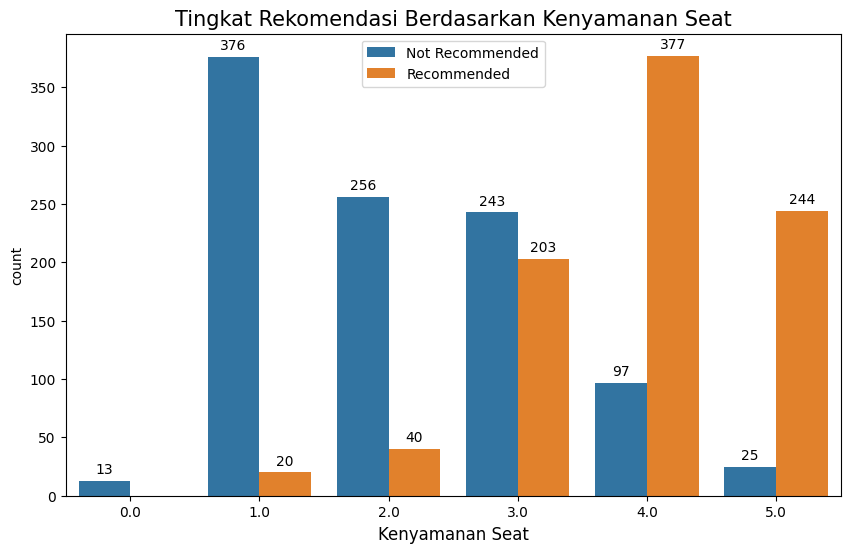

In [120]:
fig, ax = plt.subplots(figsize=(10,6))

# Menggunakan sns.countplot() untuk membuat plot
sns.countplot(data=dfc, x='seat_comfort', hue='recommended', ax=ax)

# Menambahkan label pada bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10, padding=3)

# Menambahkan legenda dengan label yang diinginkan saja
ax.legend(labels=['Not Recommended', 'Recommended'], loc='best')

# Menyesuaikan label sumbu x
ax.set_xlabel("Kenyamanan Seat", fontsize=12)

# Menyesuaikan judul plot
ax.set_title("Tingkat Rekomendasi Berdasarkan Kenyamanan Seat", fontsize=15)

# Menampilkan plot
plt.show()

## Service Cabin Staff

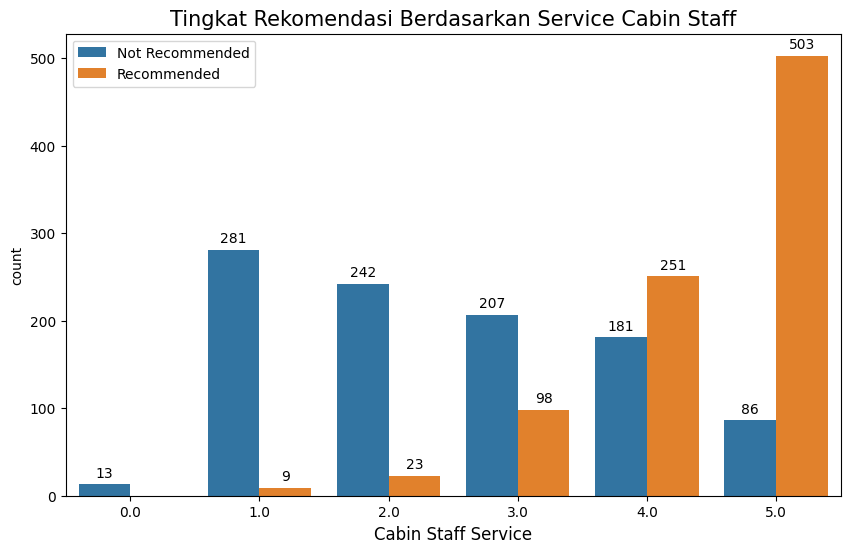

In [121]:
fig, ax = plt.subplots(figsize=(10,6))

# Menggunakan sns.countplot() untuk membuat plot
sns.countplot(data=dfc, x='cabin_staff_service', hue='recommended', ax=ax)

# Menambahkan label pada bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10, padding=3)

# Menambahkan legenda dengan label yang diinginkan saja
ax.legend(labels=['Not Recommended', 'Recommended'], loc='best')

# Menyesuaikan label sumbu x
ax.set_xlabel("Cabin Staff Service", fontsize=12)

# Menyesuaikan judul plot
ax.set_title("Tingkat Rekomendasi Berdasarkan Service Cabin Staff", fontsize=15)

# Menampilkan plot
plt.show()

## Value for Money

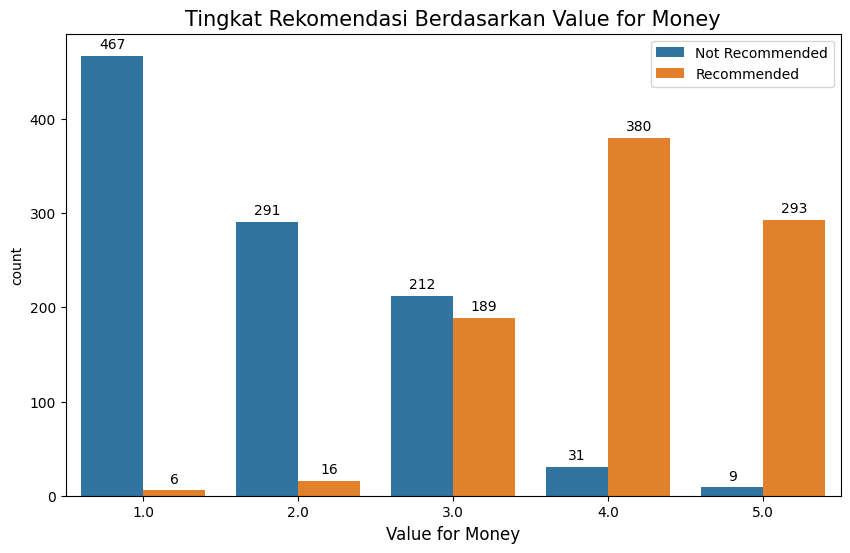

In [122]:
fig, ax = plt.subplots(figsize=(10,6))

# Menggunakan sns.countplot() untuk membuat plot
sns.countplot(data=dfc, x='value_for_money', hue='recommended', ax=ax)

# Menambahkan label pada bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10, padding=3)

# Menambahkan legenda dengan label yang diinginkan saja
ax.legend(labels=['Not Recommended', 'Recommended'], loc='best')

# Menyesuaikan label sumbu x
ax.set_xlabel("Value for Money", fontsize=12)

# Menyesuaikan judul plot
ax.set_title("Tingkat Rekomendasi Berdasarkan Value for Money", fontsize=15)

# Menampilkan plot
plt.show()

## Jumlah Rekomendasi Penumpang

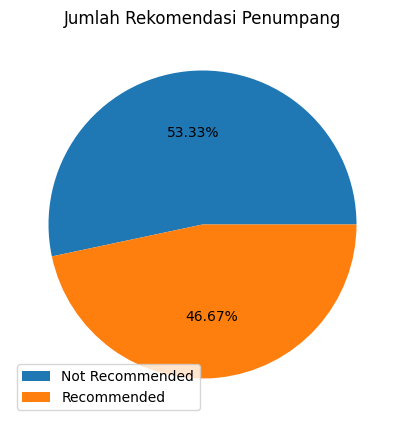

In [123]:
fig,ax1 = plt.subplots(figsize=(5,5))

dfc['recommended'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1, labels = None)
ax1.legend(labels=['Not Recommended', 'Recommended'], loc='best')
ax1.set_ylabel('')
ax1.set_title('Jumlah Rekomendasi Penumpang')
plt.show()

## Total Penumpang Berdasarkan Tipe

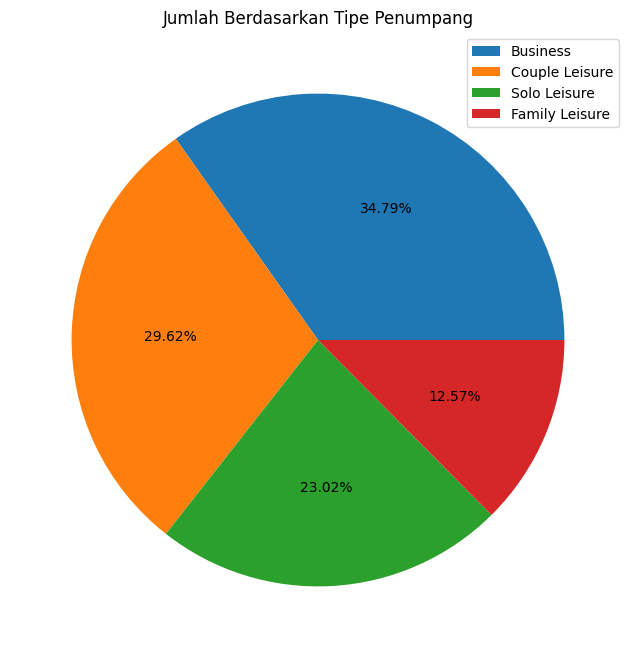

In [124]:
fig,ax1 = plt.subplots(figsize=(8,8))

dfc['type_of_travellers'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax1, labels = None)
ax1.set_ylabel('')
ax1.legend(labels=dfc['type_of_travellers'].unique(), loc='best')
ax1.set_title('Jumlah Berdasarkan Tipe Penumpang')
plt.show()

## Total Penumpang Berdasarkan Tipe Kursi

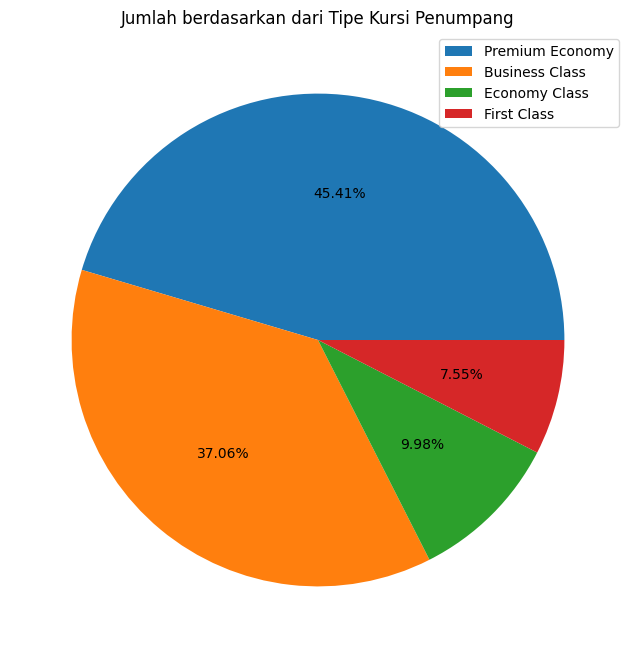

In [125]:
fig,ax1 = plt.subplots(figsize=(8,8))

dfc['seat_types'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax1, labels = None)
ax1.set_ylabel('')
ax1.legend(labels=dfc['seat_types'].unique(), loc='best')
ax1.set_title('Jumlah berdasarkan dari Tipe Kursi Penumpang')
plt.show()

# Pengambilan Kesimpulan

Bisa disimpulkan kalau saat ini Kenyamanan Seat, Service Cabin Staff, dan Value for Money sangat berpengaruh dalam tingkat rekomendasi penumpang. Jadi kita bisa meningkatkan ketiga aspek tersebut terutama kepada penumpang Economy Class dan Penumpang Couple maupun Solo sebab mereka adalah penumpang terbanyak agar tingkat rekomendasi penumpang bisa bertambah sebanyak 10% sehingga pada akhirnya perusahaan bisa meningkatkan pendapatan pada kuartal berikutnya.

# Saran

* Untuk Kenyamanan Seat bisa dilakukan dengan maintenance seat secara berkala dan melakukan pembersihan sebelum penerbangan agar bisa meningkatkan kualitas kenyamanan kepada penumpang.
* Untuk Service Cabin Staff bisa ditingkatkan dengan memberikan pelatihan khusus dan intensif kepada para Cabin Staff yg masih aktif
* Untuk Value for Money mungkin bisa dipertimbangkan dengan menghitung kembali harga tiket pesawat sesuai dengan fasilitas yg perusahaan berikan

In [126]:
dfc.to_csv('airlines_cleaned.csv', index=False)